In [1]:
import numpy as np

f = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"

f = np.load(f, allow_pickle=True)

spec = f["behavioralArr"]
labels = f["colors_per_timepoint"]



['embStartEnd', 'embVals', 'behavioralArr', 'mean_colors_per_minispec', 'colors_per_timepoint']


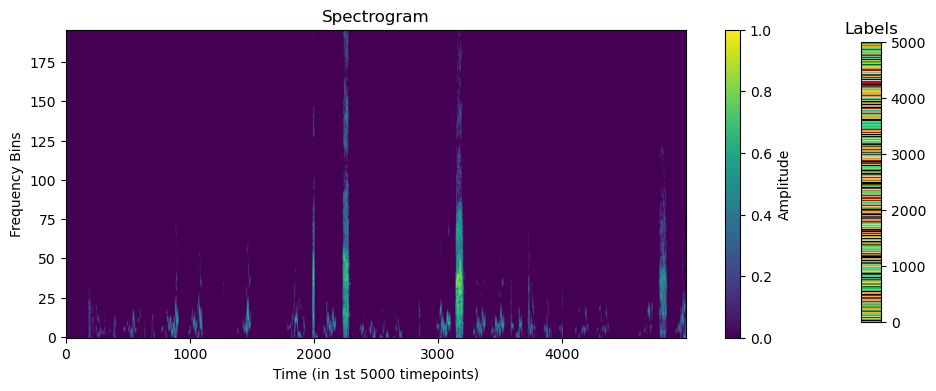

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["behavioralArr"]  # Spectrogram data
    labels = data["colors_per_timepoint"]  # RGB color labels per timepoint
    
    # Only consider the first 5000 timepoints for plotting
    spec_slice = spec[:, :5000]  # Take all frequency bins, but only the first 5000 timepoints
    labels_slice = labels[:5000, :]  # Take the first 5000 RGB labels
    
    # Create a figure and axis for the spectrogram
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Plot the sliced spectrogram on the specified axis
    cax = ax.imshow(spec_slice, aspect='auto', origin='lower')
    fig.colorbar(cax, ax=ax, label='Amplitude')
    ax.set_xlabel('Time (in 1st 5000 timepoints)')
    ax.set_ylabel('Frequency Bins')
    ax.set_title('Spectrogram')

    # Create a custom color bar for labels
    # Define a colormap with the sliced labels and a normalization instance
    cmap = mcolors.ListedColormap(labels_slice)
    norm = mcolors.Normalize(vmin=0, vmax=labels_slice.shape[0])

    # Create another axis for the color bar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust the position and size as needed
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
    cbar_ax.set_title('Labels')

    plt.show()

# Replace the placeholder path with your actual file path
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"
plot_spectrogram_with_labels(file_path)


AttributeError: module 'matplotlib.colors' has no attribute 'ColorbarBase'

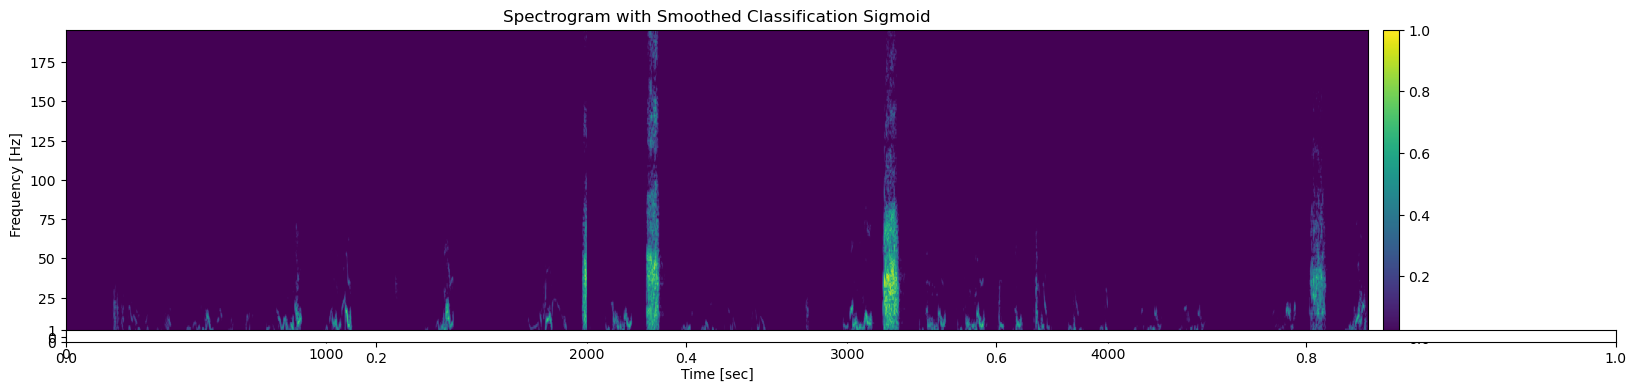

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["behavioralArr"]  # Spectrogram data
    labels = data["colors_per_timepoint"]  # RGB color labels per timepoint
    
    # Only consider the first 5000 timepoints for plotting
    spec_slice = spec[:, :5000]  # Take all frequency bins, but only the first 5000 timepoints
    labels_slice = labels[:5000, :]  # Take the first 5000 RGB labels
    
    # Create a figure and axis for the spectrogram
    fig, ax = plt.subplots(figsize=(20, 4))
    
    # Plot the sliced spectrogram on the specified axis
    cax = ax.imshow(spec_slice, aspect='auto', origin='lower')
    ax.set_xlabel('Time [sec]')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_title('Spectrogram with Smoothed Classification Sigmoid')

    # Add a color bar for the spectrogram
    fig.colorbar(cax, ax=ax, orientation='vertical', pad=0.01)

    # Create a custom color bar for labels
    # Define a colormap with the sliced labels and a normalization instance
    norm = mcolors.Normalize(vmin=0, vmax=labels_slice.shape[0])
    label_colors = mcolors.ListedColormap(labels_slice)

    # Create an axis for the color bar below the spectrogram
    cbar_ax = fig.add_axes([0.125, 0.1, 0.775, 0.03])  # position and size of the color bar
    cb = mcolors.ColorbarBase(cbar_ax, cmap=label_colors, norm=norm, orientation='horizontal')
    cb.set_label('Behavioral State')

    plt.show()

# Replace the placeholder path with your actual file path
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"
uploaded_image_path = "/mnt/data/image.png"
plot_spectrogram_with_labels(file_path)


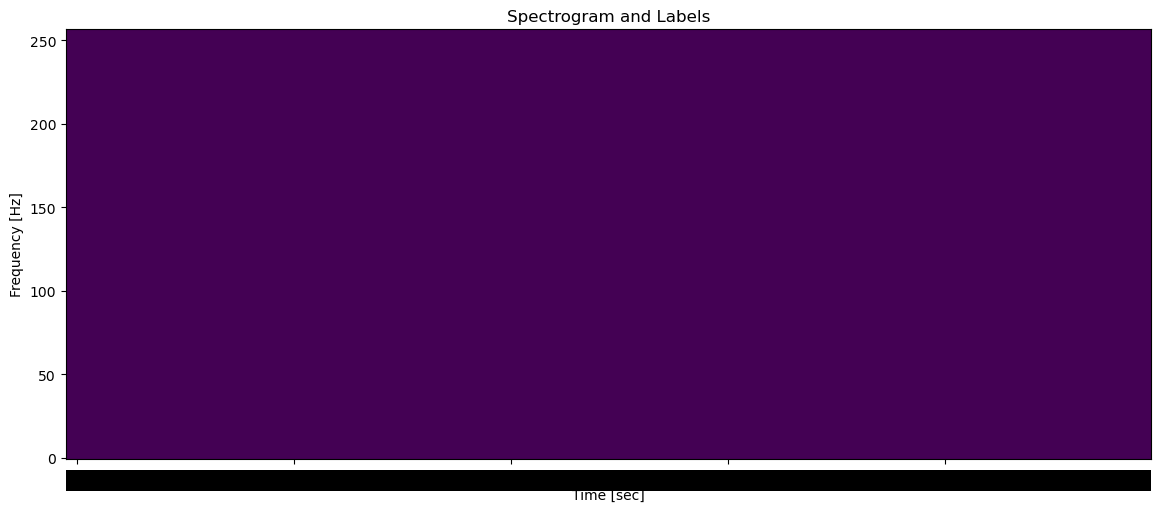

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_spectrogram_with_labels(file_path):
    # Load data from the .npz file
    data = np.load(file_path, allow_pickle=True)
    spec = data["behavioralArr"]  # Spectrogram data
    labels = data["colors_per_timepoint"]  # RGB color labels per timepoint
    
    # Only consider the first 5000 timepoints for plotting
    spec_slice = spec[:, :5000]  # Take all frequency bins, but only the first 5000 timepoints
    labels_slice = labels[:5000, :]  # Take the first 5000 RGB labels
    
    # Set up the figure and gridspec
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(2, 1, height_ratios=[20, 1], hspace=0.05)
    
    # Create a spectrogram axis
    ax0 = fig.add_subplot(gs[0])
    im = ax0.imshow(spec_slice, aspect='auto', origin='lower')
    ax0.set_xlabel('Time [sec]')
    ax0.set_ylabel('Frequency [Hz]')
    ax0.set_title('Spectrogram and Labels')

    # # Add the main color bar for the spectrogram
    # cbar = fig.colorbar(im, ax=ax0, orientation='horizontal', pad=0.01)
    # cbar.set_label('Amplitude')

    # Create an axis for the labels color bar
    ax1 = fig.add_subplot(gs[1])
    ax1.imshow(labels_slice[np.newaxis, :, :], aspect='auto', origin='lower', cmap=mcolors.ListedColormap(labels_slice))
    
    # Remove y-ticks, y-label and x-ticks from the labels color bar
    ax1.axis('off')

    plt.show()

# Load the NPZ file and call the function to plot
file_path = "/home/george-vengrovski/Documents/projects/tweety_bert_paper/files/umap_dict_file.npz"
plot_spectrogram_with_labels(file_path)


In [5]:

import numpy as np

f = "/media/george-vengrovski/disk2/canary_temp/llb3_data_matrices/llb3_data_matrices/llb3_0010_2018_04_23_15_03_45.wav.npz"

f = np.load(f, allow_pickle=True)
print(f.files)


f = "/media/george-vengrovski/disk2/canary_temp/canary_spec/llb3_0002_2018_04_23_14_18_03.npz"

f = np.load(f, allow_pickle=True)
print(f["s"].shape)

['s']
(513, 6362)
